In [1]:
from unet import Unet
from n2v import N2VConfig, N2VDataGenerator
from os.path import join

dataset_dir = r'C:\Users\bioimaging1\Desktop\Deep learning image\actin'
noisy_inputs = ["actin-20x-noise1-lowsnr.tif",
            "actin-confocal-lowsnr.tif",
            "actin-60x-noise1-lowsnr.tif"]
ground_truth = ["actin-20x-noise1-highsnr.tif",
            "actin-confocal-highsnr.tif",
            "actin-60x-noise1-highsnr.tif"] 
file_paths = [join(dataset_dir, dataset) for dataset in noisy_inputs]
ground_truth_paths = [join(dataset_dir, dataset) for dataset in ground_truth]
config = N2VConfig(file_paths, ground_truth_paths,
                   patch_shape=(128, 128),
                   validation_split=0.08,
                   patches_per_batch=32,
                   data_augmentation=3,
                   epochs=20)

n2v_data_generator = N2VDataGenerator(config)
unet = Unet(config, model_summary=False)

In [2]:
history = unet.train(n2v_data_generator)
# 可以在Tensorboard查看训练损失和验证损失的变化情况
# cmd: tensorboard --logdir tensorboard 

------------TRAINING BEGINS-------------
Epoch 1/20
6568/6568 [==============================] - 2653s 402ms/step - loss: 0.0031 - val_loss: 0.0056 - lr: 0.0010
Epoch 2/20
6568/6568 [==============================] - 2698s 411ms/step - loss: 0.0021 - val_loss: 0.0079 - lr: 0.0010
Epoch 3/20
6568/6568 [==============================] - 2717s 414ms/step - loss: 0.0020 - val_loss: 0.0113 - lr: 0.0010
Epoch 4/20
6568/6568 [==============================] - 2711s 413ms/step - loss: 0.0019 - val_loss: 0.0118 - lr: 0.0010
Epoch 5/20
6568/6568 [==============================] - 2650s 403ms/step - loss: 0.0017 - val_loss: 0.0071 - lr: 3.0000e-04
Epoch 6/20
6568/6568 [==============================] - 2645s 403ms/step - loss: 0.0017 - val_loss: 0.0087 - lr: 3.0000e-04


In [3]:
# 用小数据集做实验
result=unet.evaluate(n2v_data_generator, divide=1, save_dir="restored_images_residual_connection")

-----------EVALUATION BEGINS------------
279/279 images have been processed


In [4]:
print(result)

{'duration': 0.3, 'ssim': 0.43, 'psnr': 22.8, 'old_ssim': 0.37, 'old_psnr': 19.88}


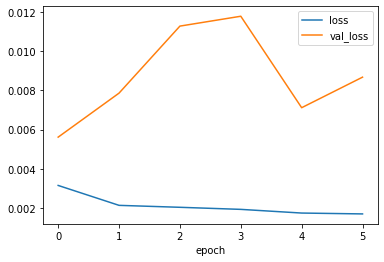

In [16]:
loss=history.history['loss']
val_loss=history.history['val_loss']
import matplotlib.pyplot as plt
epochs=range(len(loss))
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.xlabel("epoch")
plt.legend()
